In [14]:
# %matplotlib inline
%time from hikyuu.interactive import *

CPU times: total: 0 ns
Wall time: 0 ns


In [2]:
help(DMA)

Help on built-in function DMA in module hikyuu.cpp.core312:

DMA(...) method of pybind11_builtins.pybind11_detail_function_record_v1_msvc_md_mscver19 instance
    DMA(x: hikyuu.cpp.core312.Indicator, a: hikyuu.cpp.core312.Indicator, fill_null: bool = True) -> hikyuu.cpp.core312.Indicator

    DMA(ind, a[, fill_null=True])

        动态移动平均

        用法：DMA(X,A),求X的动态移动平均。

        算法：若Y=DMA(X,A) 则 Y=A*X+(1-A)*Y',其中Y'表示上一周期Y值。

        例如：DMA(CLOSE,VOL/CAPITAL)表示求以换手率作平滑因子的平均价

        :param Indicator ind: 输入数据
        :param Indicator a: 动态系数
        :param bool fill_null: 日期对齐时缺失数据填充 nan 值。
        :rtype: Indicator



KData{
  size : 100
  stock: Stock(SZ, 002436, 兴森科技, A股, 1, 2010-06-18 00:00:00, +infinity),
  query: KQuery(-100, 9223372036854775807, INDEX, DAY, NO_RECOVER)
  first: KRecord(Datetime(20250609000000), 12.0400, 12.1200, 11.9800, 12.0200, 36779.7000, 305413.0000)
  last: KRecord(Datetime(20251103000000), 21.0600, 21.4700, 20.4600, 21.3300, 149277.4000, 711255.0000)
}
Indicator{
  name: MUL
  size: 100
  discard: 11
  result sets: 1
  params: params[kdata(KData): SZ002436, ]
  support indicator param: False
  formula: ABS(ABS(CLOSE - REF(CLOSE)) / SUM(ABS(CLOSE - REF(CLOSE)))) * CVAL + CVAL * ABS(ABS(CLOSE - REF(CLOSE)) / SUM(ABS(CLOSE - REF(CLOSE)))) * CVAL + CVAL
  first: 2025-06-09 00:00:00
  last: 2025-11-03 00:00:00
  values0: [nan, nan, nan, ..., 0.0223714, 0.0218654, 0.0947118]
}


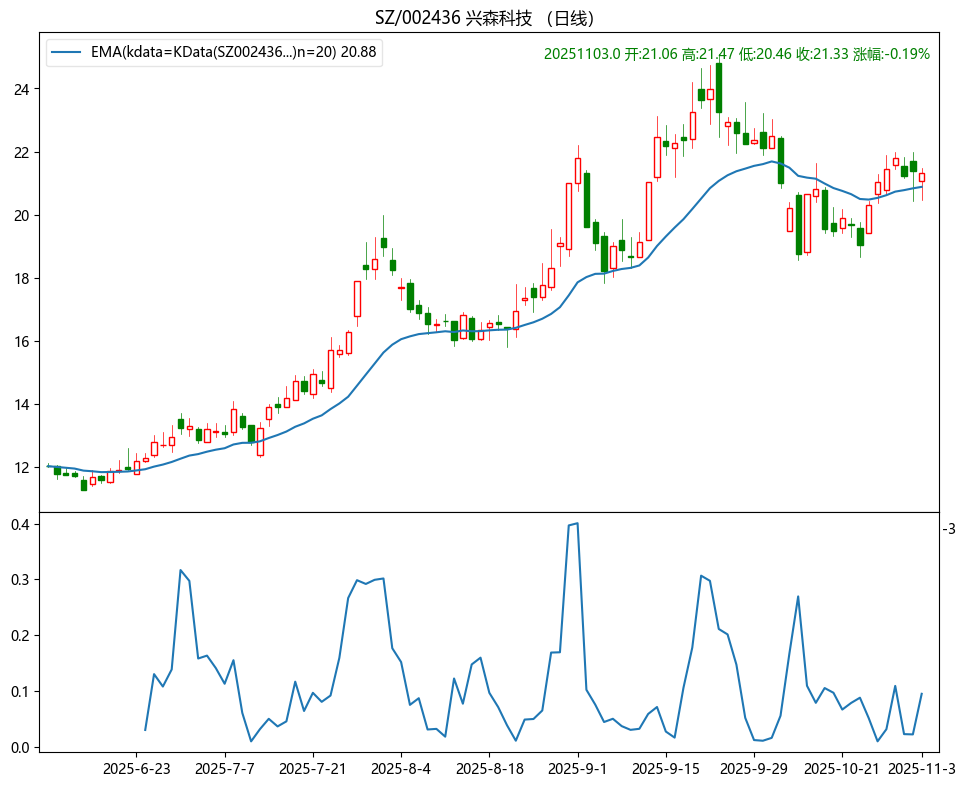

In [6]:
# 读取通达信的数据
N = 3
M = 21def load_rps_10(code: str):
    
    idx_df = extdata_util.load_idx_data("C:\\hwx\\T0002\\extdata\\extdata_1.idx")
    print(idx_df.head())
    idx_df.to_csv("extdata_1_idx.csv")
    
    stock_data = extdata_util.load_stock_data_optimized(dat_path = "C:\\hwx\\T0002\\extdata\\extdata_1.dat",
                                           idx_df = idx_df,
                                           stock_codes = {code})
    df = stock_data[code]
    print(df.head())
    df['value_f'] /= 10
    df['date'] = pd.to_datetime(df['date_int'].astype(str), format='%Y%m%d')
    return df
X_1 =  ABS(CLOSE() - REF(CLOSE(), 11))
X_2 =  SUM(ABS(CLOSE()-REF(CLOSE(), 1)),  11)
X_3 = ABS(X_1 / X_2)
X_4 = X_3 * (2 / N - 2 / M) + 2 / M
X_5 = X_4 * X_4

SSF1 = X_5
# SSF1 = EMA(CLOSE(), X_5)

# s = sm['sh880003']
# s = sm['sz399006']
# s = sm['sh000688']
s = sm['sz002436']
k = s.get_kdata(Query(-100))
print(k)

#创建两个显示坐标轴的窗口
ax1,ax2 = create_figure(2)

#在第一个坐标轴中绘制K线和EMA
k.plot(axes=ax1)
ma = EMA(CLOSE(k), 20)
ma.plot(axes=ax1, legend_on=True)

ssf1 = SSF1(k)
print(ssf1)
ssf1.plot(axes=ax2)

In [9]:
import sys
import os

# 获取当前 Notebook 的目录
notebook_dir = os.getcwd()

# 假设项目根目录是 Notebook 所在目录的上一级
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# 将项目根目录添加到 sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

# 现在可以导入 src 目录下的模块
from tdx import extdata_util

# 使用模块中的类
# obj = my_custom_module.MyClass("Bob")
# print(obj.greet())  # 输出: Hello, Bob!

In [10]:
def load_ssf1(code: str):
    
    idx_df = extdata_util.load_idx_data("C:\\hwx\\T0002\\extdata\\extdata_33.idx")
    print(idx_df.head())
    idx_df.to_csv("extdata_1_idx.csv")
    
    stock_data = extdata_util.load_stock_data_optimized(dat_path = "C:\\hwx\\T0002\\extdata\\extdata_33.dat",
                                           idx_df = idx_df,
                                           stock_codes = {code})
    df = stock_data[code]
    print(df.head())
    # df['value_f']
    df['date'] = pd.to_datetime(df['date_int'].astype(str), format='%Y%m%d')
    return df

df = load_ssf1('002436')
x = df_to_ind(df, 'value_f', 'date')
print(x)

2025-11-04 21:02:55,436 [INFO] 加载idx文件: C:\hwx\T0002\extdata\extdata_33.idx [tdx.extdata_util::load_idx_data]
2025-11-04 21:02:55,468 [INFO] 优化加载dat文件: C:\hwx\T0002\extdata\extdata_33.dat [tdx.extdata_util::load_stock_data_optimized]


   i  market_code stock_code  record_count  cum_sum
0  0            0     000001           489        0
1  1            0     000002           489      489
2  2            0     000006           489      978
3  3            0     000007           489     1467
4  4            0     000008           489     1956


加载股票数据: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5144/5144 [00:00<00:00, 25649.15只/s]

   date_int  time_int    value_f
0  20231026         0  12.490000
1  20231027         0  12.521020
2  20231030         0  12.682465
3  20231031         0  12.933650
4  20231101         0  13.234039
Indicator{
  name: PRICELIST
  size: 489
  discard: 0
  result sets: 1
  params: params[align_date_list(DatetimeList): 489, data(PriceList): 489, discard(int): 0, kdata(KData): Null, ]
  support indicator param: False
  formula: PRICELIST
  first: 2023-10-26 00:00:00
  last: 2025-10-31 00:00:00
  values0: [12.49, 12.521, 12.6825, ..., 20.6411, 20.6808, 20.7038]
}


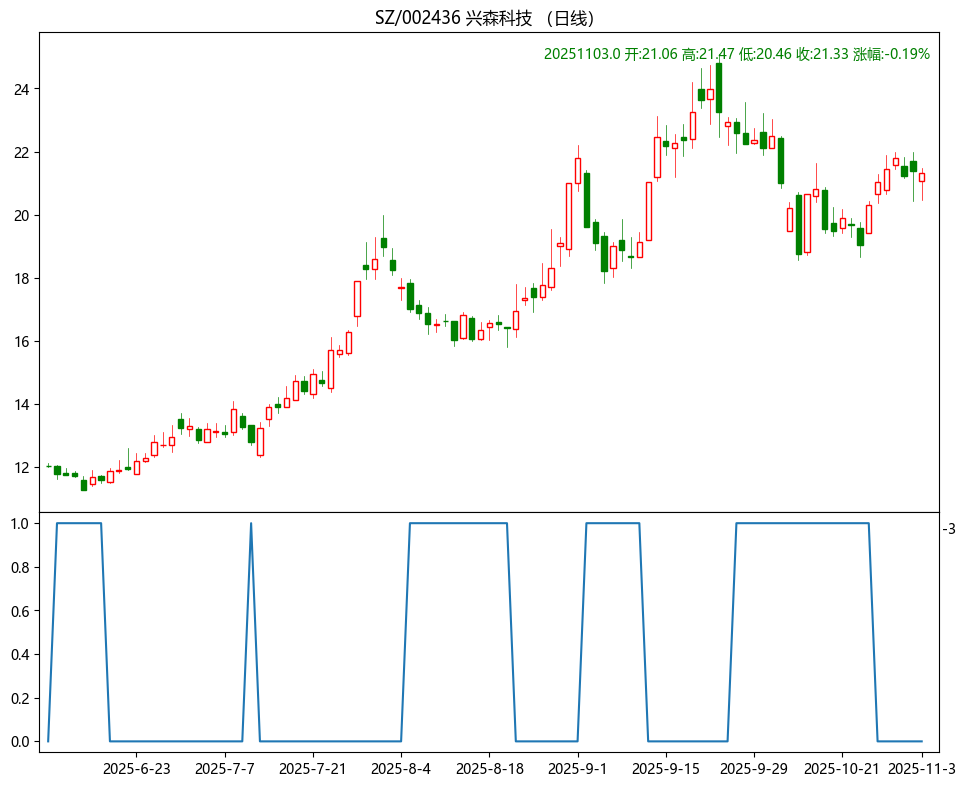

In [17]:
code = '002436'
s = sm['sz002436']
q = Query(-100, recover_type=Query.FORWARD)
# q = Query(-100, recover_type=Query.FORWARD)
k = s.get_kdata(q)
ssf1 = ALIGN(x, k)
c = CLOSE(k)

#创建两个显示坐标轴的窗口
ax1,ax2 = create_figure(2)

#在第一个坐标轴中绘制K线和EMA
k.plot(axes=ax1)
(ssf1>c).plot(axes=ax2)
# c.plot(axes=ax2)


In [15]:
help()

NameError: name 'plot' is not defined